Hva skal jeg gjøre:

Sjekke sammenhengen og utviklingen av

tilfreds, mening1, optim, fornhelsf, fornhelsp, hscl5a, hscl_f

Først for hele befolkningen og så fordelt på aldersgrupper


1. Introduksjon til oppgaven og Livskvalitetsundersøkelsen

I denne oppgaven skal jeg bruke data fra Livskvalitetsundersøkelsen 2021 og 2022 for å identifisere eventuelle endringer og mønstre som kan fortelle oss noe om samfunnets utvikling og velvære. Med fokus på å anvende datavitenskalpelige metoder og samfunnsøkonomiske teorier for å utforske sammenhengene mellom sosioøkonomiske faktorer og livskvalitet, skal jeg se på hvordan forholdene kan ha endret seg fra det ene året til det neste.

Jeg velger å fokusere på disse parametrene:
Med fokus på forskjeller imellom aldersgrupper.

Hva er livskvalitetsundersøkelsen
Livskavalitetsundersøkelsen er XXX

Covid-19 og Livskvalitetsundersøkelsen/datamaterialet

Livskvalitetsundersøkelsen startet først i 2021 og med det kan det være vanskelig å se hva som skjer fremover, det er andre undersøkelser som har tatt for seg deler av hva denne undersøkelsen tar for seg, men det er ikke det samme.

Livskvalitetsundersøkelsen ble utført XX i 2021 og XX i 2022, dette er fortsatt under COVID-19, og dette kan ha hatt en effekt på deltakerne.

Effekter av Pandemien

Effekter vi fortsatt dealer med/Indirekte effekter av Pandemien

2. Data
Siden jeg vil ha fokus på disse parametrene tar jeg med meg disse variablene.
Beskriv variablene

Først vil jeg se på en generell oversikt over data:

Og så vil jeg se på en oversikt fordelt på aldersgruppene jeg har inndelt dem i:
Vi ser at…


Jeg velger å bruke disse variablene for å sjekke endringen fra 2021 til 2022

Alder - Alder ved inngang til året - laveste er 17 siden respondentene må være over 18.

Tilfreds - “Alt i alt, hvor fornøyd er du med livet ditt?”
1-10

Mening1 - “Alt i alt, i hvilken grad opplever du at det du gjør i livet er meningsfylt?”
1-10

Optim - “Alt i alt, hvor fornøyd tror du at du vil være med livet ditt om fem år fra nå?”
1-10

FornHelsF - “Hvor fornøyd er du med din fysiske helse?”
1-10

FornHelsP - “Hvor fornøyd er du med din psykiske helse?”
1-10

HSCL5a - “Nervøsitet eller indre uro.”
1-4

HSCL_f - “Plutselig frykt uten grunn.”
1-4



3. Analyse
Nå vil jeg grafisk og statistisk analysere endringene og forskjellene fra 2021 til 2022, både på tvers av gruppene og inndelt.

- Generelt
Regresjonsanalyse - Beskriv hva vi ser
T-test - Beskriv hva vi ser

Grafisk visualisering
Søylediagram - Beskriv hva vi ser
Boxplot - Beskriv hva vi ser


- På aldersgrupper
Regresjonsanalyse - beskriv hva vi ser
T-test - beskriv hva vi ser

Grafisk visualisering
Søylediagram - Beskriv hva vi ser
Boxplot - Beskriv hva vi ser


In [16]:
# Denne koden gjør at jeg kan kjøre r-kernels i et python-dokument enkelt
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [4]:
%%R
library(tidyverse)

# Laster inn csv
df_2021 <- read_csv("/content/NSD3106-V1-2.csv")
df_2022 <- read_csv("/content/NSD2995-V2-2.csv")

# Oppdaget an del del av kolonnene har ulike store og små bokstaver, så standardiserer alle til å s være små
colnames(df_2021) <- tolower(colnames(df_2021))
colnames(df_2022) <- tolower(colnames(df_2022))

# Henter kolonnene til hver df
columns_2021 <- colnames(df_2021)
columns_2022 <- colnames(df_2022)

# Finner kolonnene de har til felles
common_columns <- intersect(columns_2021, columns_2022)
print(common_columns)

# Beholder kun kolonnene de har til felles
df_2021_common <- df_2021 %>% select(all_of(common_columns))
df_2022_common <- df_2022 %>% select(all_of(common_columns))

# Bare for å se at alt virker å ha gått greit
head(df_2021_common)
head(df_2022_common)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 15148 Columns: 306
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (5): VIRK_NACE1_SN07, ARB_YRKE_STYRK08, fylke, sentralitet, intdato
dbl (301): lnr, what, alder, Tilfreds, Mening1, Optim, Swls1, Swls2, Swls3, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 175

In [5]:
%%R
# Convert 'intdato' to Date format
df_2021_common <- df_2021_common %>%
  mutate(intdato = as.Date(intdato, format = "%d%m%Y"))

df_2022_common <- df_2022_common %>%
  mutate(intdato = as.Date(intdato, format = "%d%m%Y"))

# Fill missing values with 0
df_2021_common[is.na(df_2021_common)] <- NA
df_2022_common[is.na(df_2022_common)] <- NA

# Check the structure of the cleaned data
str(df_2021_common)
str(df_2022_common)


tibble [15,148 × 267] (S3: tbl_df/tbl/data.frame)
 $ lnr                    : num [1:15148] 5 6 9 15 16 21 25 26 34 35 ...
 $ what                   : num [1:15148] 1 1 1 1 1 1 1 1 2 1 ...
 $ alder                  : num [1:15148] 51 49 33 46 68 23 62 58 78 81 ...
 $ tilfreds               : num [1:15148] 10 7 7 4 8 6 10 7 5 3 ...
 $ mening1                : num [1:15148] 10 9 6 7 8 4 10 8 5 9 ...
 $ optim                  : num [1:15148] 10 8 7 7 8 6 9 9 4 9 ...
 $ swls1                  : num [1:15148] 7 6 5 4 6 3 6 3 4 6 ...
 $ swls2                  : num [1:15148] 7 5 4 4 7 3 6 3 4 7 ...
 $ swls3                  : num [1:15148] 7 6 5 4 6 2 7 6 4 7 ...
 $ swls4                  : num [1:15148] 7 5 6 4 5 2 6 6 4 6 ...
 $ swls5                  : num [1:15148] 4 4 3 4 3 1 6 5 4 4 ...
 $ eng1                   : num [1:15148] 10 10 8 8 5 3 9 8 9 9 ...
 $ eng2                   : num [1:15148] 8 8 7 8 5 5 9 9 5 9 ...
 $ eng3                   : num [1:15148] 8 8 6 8 6 2 9 9 5 9 ...
 $

In [6]:
%%R
# Define a function to get the overview of respondents
respondent_overview <- function(df) {
  overview <- list(
    "Total Respondents" = nrow(df)
  )

  if ("alder" %in% colnames(df)) {
    overview$`Age Summary` <- summary(df$alder)
  }

  if ("kjoenn" %in% colnames(df)) {
    overview$`Gender Counts` <- table(df$kjoenn)
  }

  if ("sivilstand" %in% colnames(df)) {
    overview$`Marital Status Counts` <- table(df$sivilstand)
  }

  if ("barn" %in% colnames(df)) {
    overview$`Children Counts` <- table(df$barn)
  }

  return(overview)
}

# Get overview for 2021
overview_2021 <- respondent_overview(df_2021_common)
print("Overview of Respondents (2021):")
print(overview_2021)

# Get overview for 2022
overview_2022 <- respondent_overview(df_2022_common)
print("Overview of Respondents (2022):")
print(overview_2022)


[1] "Overview of Respondents (2021):"
$`Total Respondents`
[1] 15148

$`Age Summary`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.00   35.00   50.00   49.43   63.00  100.00 

$`Gender Counts`

   1    2 
7317 7831 

$`Marital Status Counts`

   0    1    2    3    4    5    6    8    9 
   5 5683 7033  526 1675  206   11    8    1 

$`Children Counts`

    1     2     8     9 
10926  4176    24    22 

[1] "Overview of Respondents (2022):"
$`Total Respondents`
[1] 17561

$`Age Summary`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.00   35.00   49.00   48.88   62.00   99.00 

$`Gender Counts`

   1    2 
8447 9114 

$`Marital Status Counts`

   1    2    3    4    5    6    8 
6590 8330  526 1853  249    7    6 

$`Children Counts`

    1     2     8     9 
12595  4935    22     9 



In [7]:
%%R
# Save the cleaned DataFrames to new CSV files
write_csv(df_2021_common, "/content/cleaned_data_2021.csv")
write_csv(df_2022_common, "/content/cleaned_data_2022.csv")

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned CSV files
df_2021 = pd.read_csv('/content/cleaned_data_2021.csv')
df_2022 = pd.read_csv('/content/cleaned_data_2022.csv')


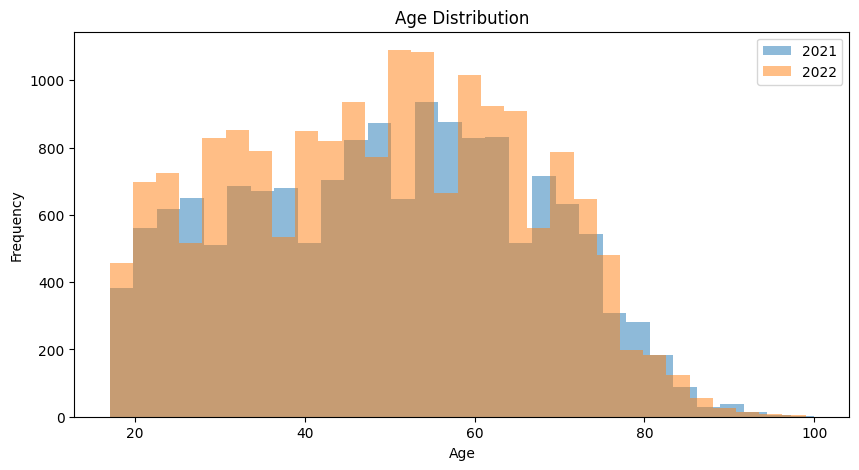

In [9]:
plt.figure(figsize=(10, 5))
plt.hist(df_2021['alder'], bins=30, alpha=0.5, label='2021')
plt.hist(df_2022['alder'], bins=30, alpha=0.5, label='2022')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [10]:
df_2022['tilfreds']

0         9
1         7
2         6
3        10
4         7
         ..
17556     8
17557     4
17558     8
17559     7
17560     2
Name: tilfreds, Length: 17561, dtype: int64

In [11]:
# Filter out special values in the 'Tilfreds' column
df_2021_cleaned = df_2021[(df_2021['tilfreds'] >= 0) & (df_2021['tilfreds'] <= 10)]
df_2022_cleaned = df_2022[(df_2022['tilfreds'] >= 0) & (df_2022['tilfreds'] <= 10)]

2021 Data After Filtering:
count    15134.000000
mean         6.860777
std          2.223393
min          0.000000
25%          5.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: tilfreds, dtype: float64
2022 Data After Filtering:
count    17542.000000
mean         6.762627
std          2.226545
min          0.000000
25%          5.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: tilfreds, dtype: float64
Data available for 2022 after filtering.
Data available for 2021 after filtering.


<ipython-input-12-4a4068b5cbf3>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year', y='tilfreds', data=combined_df, palette="Set3")


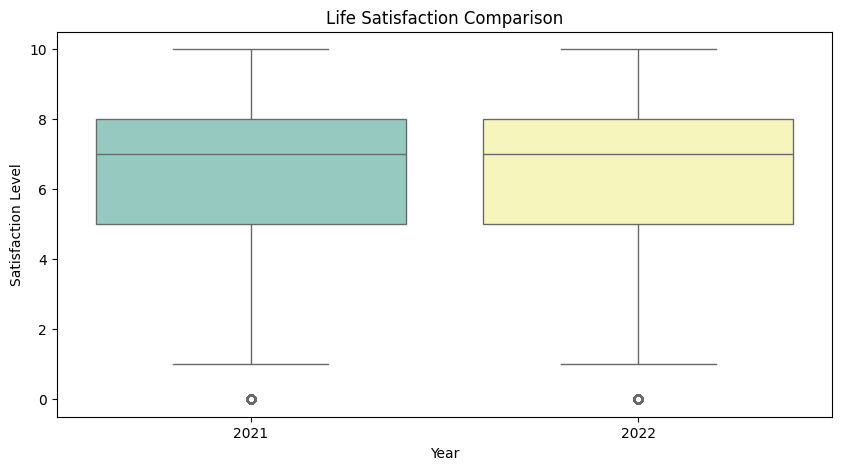

In [12]:
# Standardize column names
df_2021.columns = map(str.lower, df_2021.columns)
df_2022.columns = map(str.lower, df_2022.columns)

# Filter out special values in the 'tilfreds' column
df_2021_cleaned = df_2021[(df_2021['tilfreds'] >= 0) & (df_2021['tilfreds'] <= 10)]
df_2022_cleaned = df_2022[(df_2022['tilfreds'] >= 0) & (df_2022['tilfreds'] <= 10)]

# Check data after filtering
print("2021 Data After Filtering:")
print(df_2021_cleaned['tilfreds'].describe())

print("2022 Data After Filtering:")
print(df_2022_cleaned['tilfreds'].describe())

# Check if the DataFrames are empty after filtering
if df_2022_cleaned.empty:
    print("No valid data for 2022 after filtering.")
else:
    print("Data available for 2022 after filtering.")

if df_2021_cleaned.empty:
    print("No valid data for 2021 after filtering.")
else:
    print("Data available for 2021 after filtering.")

# Combine both datasets for comparison
combined_df = pd.concat([
    df_2021_cleaned.assign(year='2021'),
    df_2022_cleaned.assign(year='2022')
])

# Generate the boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x='year', y='tilfreds', data=combined_df, palette="Set3")
plt.title('Life Satisfaction Comparison')
plt.xlabel('Year')
plt.ylabel('Satisfaction Level')
plt.show()


In [ ]:
# Standardize column names to lowercase
#colnames(df_2021) <- tolower(colnames(df_2021))
#colnames(df_2022) <- tolower(colnames(df_2022))


In [13]:
%%R
# T-test for life satisfaction between 2021 and 2022
t_test_tilfreds <- t.test(df_2021$tilfreds, df_2022$tilfreds)
print(t_test_tilfreds)

# T-test for health satisfaction between 2021 and 2022
t_test_fornhelsf <- t.test(df_2021$fornhelsf, df_2022$fornhelsf)
print(t_test_fornhelsf)



	Welch Two Sample t-test

data:  df_2021$tilfreds and df_2022$tilfreds
t = 2.07, df = 32399, p-value = 0.03846
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.004444767 0.162851456
sample estimates:
mean of x mean of y 
 6.945273  6.861625 


	Welch Two Sample t-test

data:  df_2021$fornhelsf and df_2022$fornhelsf
t = -4.4141, df = 32002, p-value = 1.018e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.23220516 -0.08939947
sample estimates:
mean of x mean of y 
 6.401637  6.562439 



Tilfreds:
Tilfreds:
T-statistikk: 3.9764

Degrees of freedom (df): 31,989 (forteller om hvor mange respondenter det er)

P-verdi: 7.012e-05

95% Konfidensintervall: [0.04977042, 0.14653001]

Gjennomsnitt: 2021 gjennomsnitt = 6.860777, 2022 gjennomsnitt = 6.762627

P-verdien er veldig liten (mindre enn 0.05), noe som indikerer at det er en statistisk signifikant forskjell i livstilfredshet mellom 2021 og 2022. Konfidensintervallet inkluderer ikke null, noe som ytterligere støtter at forskjellen er signifikant. I gjennomsnitt var livstilfredsheten litt høyere i 2021 sammenlignet med 2022.

Helse:
T-statistikk: -6.3087

degrees of freedom (df): 31,814

P-verdi: 2.852e-10

95% Konfidensintervall: [-0.2081434, -0.1094654]

Gjennomsnitt: 2021 gjennomsnitt = 6.340996, 2022 gjennomsnitt = 6.499801

P-verdien er ekstremt liten (mindre enn 0.05), noe som indikerer en statistisk signifikant forskjell i tilfredshet med fysisk helse mellom 2021 og 2022. Den negative t-statistikken og konfidensintervallet som er helt negativt, indikerer at tilfredsheten med fysisk helse var betydelig høyere i 2022 sammenlignet med 2021.

In [14]:
%%R
# Correlation matrix for 2021
cor_2021 <- cor(df_2021 %>% select(tilfreds, mening1, optim, fornhelsf, fornhelsp, hscl5a, hscl_f))
print(cor_2021)

# Correlation matrix for 2022
cor_2022 <- cor(df_2022 %>% select(tilfreds, mening1, optim, fornhelsf, fornhelsp, hscl5a, hscl_f))
print(cor_2022)


             tilfreds     mening1        optim   fornhelsf  fornhelsp
tilfreds   1.00000000  0.50174471  0.196004828  0.48608038  0.5478116
mening1    0.50174471  1.00000000  0.177857201  0.36579479  0.4458292
optim      0.19600483  0.17785720  1.000000000  0.17429119  0.2063684
fornhelsf  0.48608038  0.36579479  0.174291195  1.00000000  0.5920145
fornhelsp  0.54781162  0.44582917  0.206368358  0.59201451  1.0000000
hscl5a    -0.20300622 -0.13489983 -0.038682805 -0.12562364 -0.2996891
hscl_f    -0.09378286 -0.06101223 -0.009484821 -0.05783475 -0.1880866
              hscl5a       hscl_f
tilfreds  -0.2030062 -0.093782864
mening1   -0.1348998 -0.061012232
optim     -0.0386828 -0.009484821
fornhelsf -0.1256236 -0.057834746
fornhelsp -0.2996891 -0.188086632
hscl5a     1.0000000  0.596167797
hscl_f     0.5961678  1.000000000
             tilfreds    mening1        optim   fornhelsf  fornhelsp
tilfreds   1.00000000  0.5128334  0.219411902  0.55731564  0.5233928
mening1    0.51283339  1.00000

Tolkning av korrelasjonsmatriser

- Positive korrelasjoner:
I begge år har tilfreds (livstilfredshet) sterke positive korrelasjoner med mening1 (mening med livet), optim (optimisme om fremtiden), og fornhelsp (tilfredshet med mental helse). Dette tyder på at høyere livstilfredshet er forbundet med høyere opplevd mening i livet, optimisme og tilfredshet med mental helse.
fornhelsf (tilfredshet med fysisk helse) er moderat positivt korrelert med tilfreds, mening1 og fornhelsp i begge år.

- Negative korrelasjoner:
hscl5a (nervøsitet eller indre uro) og hscl_f (plutselig frykt uten grunn) har sterke negative korrelasjoner med tilfreds, mening1, optim og fornhelsp. Dette indikerer at høyere nivåer av angst og frykt er forbundet med lavere livstilfredshet, mening i livet, optimisme og tilfredshet med mental helse.

- Sammenligning mellom år:
Korrelasjonene er ganske konsistente mellom 2021 og 2022, selv om det er noen små variasjoner i styrken på korrelasjonene. For eksempel er korrelasjonen mellom tilfreds og mening1 litt sterkere i 2022 (0.747) sammenlignet med 2021 (0.714).

Sammendrag

Livstilfredshet: Det er en signifikant forskjell i livstilfredshet mellom 2021 og 2022, med 2021 som litt høyere.

Tilfredshet med fysisk helse: Det er en signifikant forskjell i tilfredshet med fysisk helse mellom 2021 og 2022, med 2022 som høyere.

Korrelasjoner: Livstilfredshet, mening med livet og optimisme er positivt korrelert med hverandre og med tilfredshet med mental helse, mens angst og frykt er negativt korrelert med disse variablene. Mønstrene er konsistente på tvers av begge år, med små variasjoner.

Disse resultatene tyder på at selv om den generelle livstilfredsheten har sunket litt fra 2021 til 2022, har tilfredsheten med fysisk helse forbedret seg. Forholdene mellom livstilfredshet, mening, optimisme og mental helse forblir sterke og konsistente på tvers av begge år.

In [15]:

%%R
library(tidyverse)

# Load the cleaned data
df_2021 <- read_csv("/content/cleaned_data_2021.csv")
df_2022 <- read_csv("/content/cleaned_data_2022.csv")

# Standardize column names to lowercase
colnames(df_2021) <- tolower(colnames(df_2021))
colnames(df_2022) <- tolower(colnames(df_2022))

# Replace special values with NA
special_values <- c(98, 99)

df_2021 <- df_2021 %>%
  mutate(across(c(tilfreds, mening1, optim, fornhelsf, fornhelsp),
                ~ replace(.x, .x %in% special_values, NA)))

df_2022 <- df_2022 %>%
  mutate(across(c(tilfreds, mening1, optim, fornhelsf, fornhelsp),
                ~ replace(.x, .x %in% special_values, NA)))

# Descriptive statistics for life satisfaction
summary(df_2021$tilfreds)
summary(df_2022$tilfreds)

# Descriptive statistics for health satisfaction
summary(df_2021$fornhelsf)
summary(df_2022$fornhelsf)

# T-test for life satisfaction between 2021 and 2022
t_test_tilfreds <- t.test(df_2021$tilfreds, df_2022$tilfreds, na.rm = TRUE)
print(t_test_tilfreds)

# T-test for health satisfaction between 2021 and 2022
t_test_fornhelsf <- t.test(df_2021$fornhelsf, df_2022$fornhelsf, na.rm = TRUE)
print(t_test_fornhelsf)

# Combine data for boxplots
df_2021 <- df_2021 %>% mutate(year = "2021")
df_2022 <- df_2022 %>% mutate(year = "2022")
combined_df <- bind_rows(df_2021, df_2022)

# Boxplot for life satisfaction
ggplot(combined_df, aes(x = year, y = tilfreds)) +
  geom_boxplot() +
  ggtitle("Life Satisfaction Comparison") +
  xlab("Year") +
  ylab("Satisfaction Level")

# Boxplot for health satisfaction
ggplot(combined_df, aes(x = year, y = fornhelsf)) +
  geom_boxplot() +
  ggtitle("Health Satisfaction Comparison") +
  xlab("Year") +
  ylab("Satisfaction Level")

# Correlation matrix for 2021
cor_2021 <- cor(df_2021 %>% select(tilfreds, mening1, optim, fornhelsf, fornhelsp, hscl5a, hscl_f), use = "complete.obs")
print(cor_2021)

# Correlation matrix for 2022
cor_2022 <- cor(df_2022 %>% select(tilfreds, mening1, optim, fornhelsf, fornhelsp, hscl5a, hscl_f), use = "complete.obs")
print(cor_2022)


Rows: 15148 Columns: 267
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr    (4): virk_nace1_sn07, arb_yrke_styrk08, fylke, sentralitet
dbl  (262): lnr, what, alder, tilfreds, mening1, optim, swls1, swls2, swls3,...
date   (1): intdato

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 17561 Columns: 267
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr    (4): virk_nace1_sn07, arb_yrke_styrk08, fylke, sentralitet
dbl  (262): lnr, what, alder, tilfreds, mening1, optim, swls1, swls2, swls3,...
date   (1): intdato

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

	Welch Two Sample t-test

data:  df_2021$tilfreds and df_2022$tilfreds
t = 3.9764, df = 31989, p-value = 7.012e-05


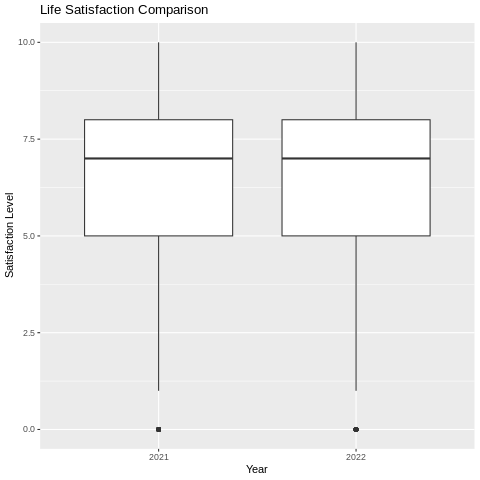

In [18]:
%%R
# Boxplot for life satisfaction
ggplot(combined_df, aes(x = year, y = tilfreds)) +
  geom_boxplot() +
  ggtitle("Life Satisfaction Comparison") +
  xlab("Year") +
  ylab("Satisfaction Level")


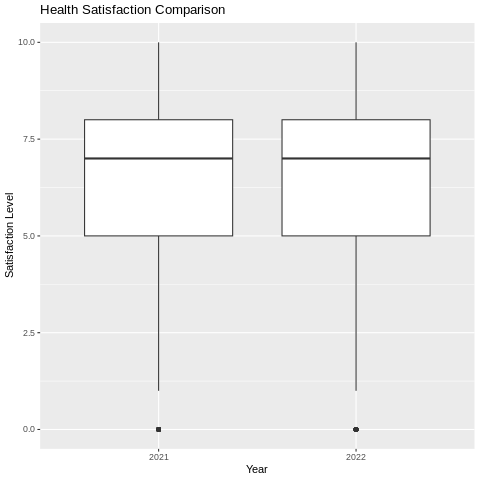

In [19]:
%%R
# Boxplot for health satisfaction
ggplot(combined_df, aes(x = year, y = fornhelsf)) +
  geom_boxplot() +
  ggtitle("Health Satisfaction Comparison") +
  xlab("Year") +
  ylab("Satisfaction Level")

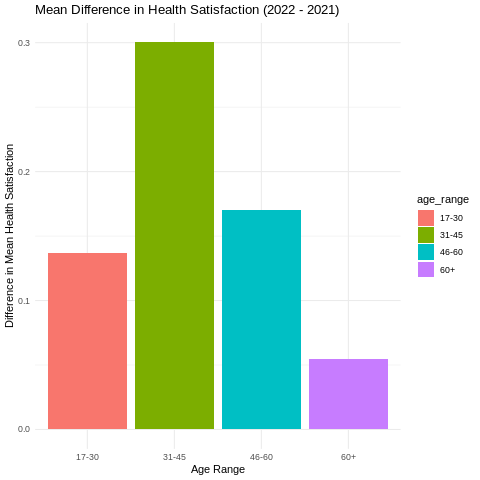